# Binary Classification Using Logistic Regression: Bank Note Forgery

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
banknotes = pd.read_csv("data/data_banknote_authentication.csv")
banknotes.head()

,Var_of_Wavelet,Skew_of_Wavelet,Curtosis_of_Wavelet,Entropy_of_Image,Forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### EDA

In [8]:
banknotes['Forgery'].value_counts()

0    762
1    610
Name: Forgery, dtype: int64

##### Data Counts:
##### Not a Forgery: 762
##### Forgery: 610

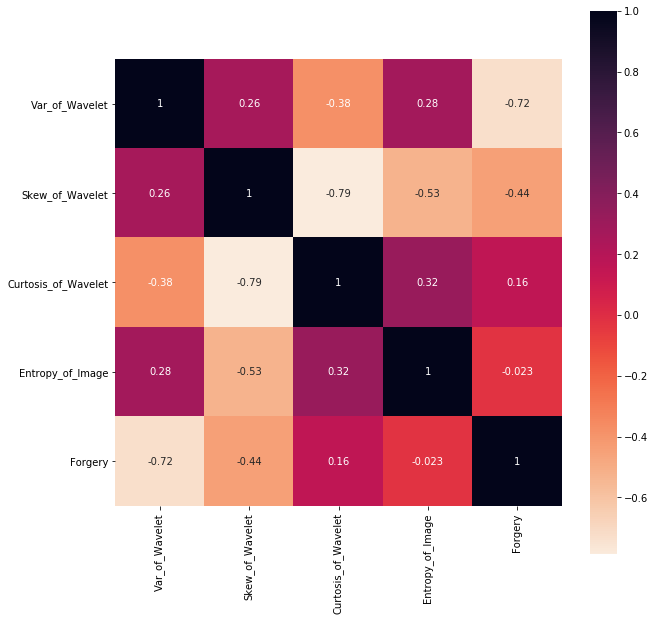

In [6]:
#looking for highest correlation with "left"
correlation = banknotes.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='rocket_r')

In [7]:
banknotes.groupby('Forgery').mean()

,Var_of_Wavelet,Skew_of_Wavelet,Curtosis_of_Wavelet,Entropy_of_Image
Forgery,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


##### Variance of Wavelet and Skew of Wavelet have the strongest effect on if the bank note is a forgery
##### Entropy of Image has the least effect on if the banknote is a forgery

### Binary Classification Using Logistic Regression

### Trying with Entropy Variable

In [45]:
#list of whether it is a forgery or not
y = banknotes['Forgery']

In [46]:
#splitting data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(banknotes,y,train_size=0.7)

In [47]:
#setting up model to use
model = LogisticRegression()

In [48]:
#fitting model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [50]:
#Looking at Accuracy
model.score(X_test,y_test)

1.0

### Trying without Entropy Variable

In [51]:
#getting rid of entropy variable
sub_bank = banknotes[["Var_of_Wavelet","Skew_of_Wavelet","Curtosis_of_Wavelet","Forgery"]]
sub_bank.head(2)

,Var_of_Wavelet,Skew_of_Wavelet,Curtosis_of_Wavelet,Forgery
0,3.6216,8.6661,-2.8073,0
1,4.5459,8.1674,-2.4586,0


In [52]:
#list of whether it is a forgery or not
y2 = sub_bank['Forgery']

In [53]:
#splitting data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(sub_bank,y2,train_size=0.7)

In [54]:
#setting up model to use
model = LogisticRegression()

In [55]:
#fitting model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
predicted = model.predict(X_test)

In [57]:
#Looking at Accuracy
model.score(X_test,y_test)

1.0

##### Looking at Percentages

In [89]:
bank_numbers = X_test.index.values.tolist()
bank_numbers

[1210,
 1147,
 237,
 1302,
 808,
 259,
 627,
 374,
 548,
 171,
 865,
 538,
 733,
 489,
 549,
 211,
 103,
 20,
 95,
 1297,
 296,
 513,
 769,
 968,
 712,
 930,
 539,
 1185,
 970,
 475,
 56,
 463,
 251,
 833,
 1342,
 979,
 567,
 1294,
 461,
 1288,
 1083,
 158,
 228,
 381,
 76,
 457,
 1336,
 424,
 1300,
 376,
 1362,
 46,
 326,
 244,
 109,
 120,
 726,
 343,
 680,
 23,
 117,
 1097,
 135,
 876,
 128,
 941,
 107,
 453,
 75,
 1139,
 299,
 827,
 937,
 1350,
 974,
 744,
 585,
 1215,
 1014,
 129,
 116,
 1330,
 192,
 774,
 106,
 754,
 662,
 101,
 886,
 966,
 350,
 817,
 1221,
 1093,
 1245,
 1032,
 452,
 189,
 1217,
 1,
 234,
 325,
 1020,
 616,
 952,
 684,
 686,
 428,
 1284,
 791,
 334,
 1286,
 1213,
 96,
 694,
 759,
 238,
 652,
 1078,
 877,
 1054,
 436,
 1296,
 1193,
 38,
 1064,
 1299,
 1265,
 291,
 525,
 590,
 146,
 432,
 1125,
 675,
 35,
 1100,
 36,
 1347,
 1115,
 178,
 619,
 479,
 1195,
 953,
 123,
 2,
 748,
 703,
 314,
 32,
 1216,
 666,
 604,
 1103,
 441,
 332,
 274,
 983,
 1123,
 758,
 347,
 2

In [90]:
model.predict_proba(X_test)

array([[1.59149464e-03, 9.98408505e-01],
       [6.29185534e-04, 9.99370814e-01],
       [9.99762348e-01, 2.37652127e-04],
       [1.11314426e-03, 9.98886856e-01],
       [8.06060120e-05, 9.99919394e-01],
       [9.99973370e-01, 2.66295500e-05],
       [9.99945300e-01, 5.47004379e-05],
       [9.95387380e-01, 4.61261960e-03],
       [9.99977654e-01, 2.23456012e-05],
       [9.99630197e-01, 3.69802663e-04],
       [1.20316562e-03, 9.98796834e-01],
       [9.99707971e-01, 2.92028843e-04],
       [9.99086726e-01, 9.13273662e-04],
       [9.99723910e-01, 2.76090241e-04],
       [9.99937921e-01, 6.20788591e-05],
       [9.99987448e-01, 1.25524546e-05],
       [9.98457512e-01, 1.54248831e-03],
       [9.99999836e-01, 1.64133581e-07],
       [9.85390682e-01, 1.46093177e-02],
       [5.66889658e-05, 9.99943311e-01],
       [9.82531252e-01, 1.74687485e-02],
       [9.99999310e-01, 6.89630603e-07],
       [6.19492662e-03, 9.93805073e-01],
       [1.88036444e-03, 9.98119636e-01],
       [9.999986

In [91]:
first_list = []
second_list = []
for i in model.predict_proba(X_test):
    first = "{:.2f}".format(i[0]*100)
    second = "{:.2f}".format(i[1]*100)
    first_list.append(first + "%")
    second_list.append(second + "%")

In [92]:
data = {'Banknote_Number':  bank_numbers,
        'Predicted_Value':  predicted,
        'Percent_Chance_Not_Forgery': first_list,
        'Percent_Chance_Forgery':  second_list
        }

percents_df = pd.DataFrame (data, columns = ['Banknote_Number','Predicted_Value','Percent_Chance_Not_Forgery','Percent_Chance_Forgery'])

In [98]:
percents_df.head(10)

,Banknote_Number,Predicted_Value,Percent_Chance_Not_Forgery,Percent_Chance_Forgery
0,1210,1,0.16%,99.84%
1,1147,1,0.06%,99.94%
2,237,0,99.98%,0.02%
3,1302,1,0.11%,99.89%
4,808,1,0.01%,99.99%
5,259,0,100.00%,0.00%
6,627,0,99.99%,0.01%
7,374,0,99.54%,0.46%
8,548,0,100.00%,0.00%
9,171,0,99.96%,0.04%
